In [284]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [285]:
import numpy as np
import pandas as pd

In [286]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [287]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func,desc

In [288]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [289]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [290]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [291]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [292]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [293]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [294]:
measure_first = session.query(Measurement).first()
measure_first

In [295]:
measure_first.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x117877710>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

![precipitation](Images/precipitation.png)

In [296]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

date = dt.datetime(2016, 8, 23)

prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
                    filter(Measurement.date).all()
last_12months_precipation = prcp_results
last_12months_precipation
ptps = list(np.ravel(results))

# List Comprehension Solution
# ptps = [result[0] for result in results]

ptps

['2016-08-24',
 0.08,
 2365,
 'USC00519397',
 79.0,
 '2016-08-25',
 0.08,
 2366,
 'USC00519397',
 80.0,
 '2016-08-26',
 0.0,
 2367,
 'USC00519397',
 79.0,
 '2016-08-27',
 0.0,
 2368,
 'USC00519397',
 77.0,
 '2016-08-28',
 0.01,
 2369,
 'USC00519397',
 78.0,
 '2016-08-29',
 0.0,
 2370,
 'USC00519397',
 78.0,
 '2016-08-30',
 0.0,
 2371,
 'USC00519397',
 79.0,
 '2016-08-31',
 0.13,
 2372,
 'USC00519397',
 80.0,
 '2016-09-01',
 0.0,
 2373,
 'USC00519397',
 81.0,
 '2016-09-02',
 0.0,
 2374,
 'USC00519397',
 80.0,
 '2016-09-03',
 0.0,
 2375,
 'USC00519397',
 79.0,
 '2016-09-04',
 0.03,
 2376,
 'USC00519397',
 75.0,
 '2016-09-05',
 None,
 2377,
 'USC00519397',
 79.0,
 '2016-09-06',
 None,
 2378,
 'USC00519397',
 76.0,
 '2016-09-07',
 0.05,
 2379,
 'USC00519397',
 76.0,
 '2016-09-08',
 0.0,
 2380,
 'USC00519397',
 80.0,
 '2016-09-09',
 0.03,
 2381,
 'USC00519397',
 79.0,
 '2016-09-10',
 0.0,
 2382,
 'USC00519397',
 78.0,
 '2016-09-11',
 0.05,
 2383,
 'USC00519397',
 76.0,
 '2016-09-12',
 0.0,


In [297]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precip_last_12mon_df = pd.DataFrame(results, columns=['date', 'prcp', 'id', 'station', 'tobs'])
precip_last_12mon_df.set_index('date', inplace=True, )
precip_last_12mon_df.head()

,prcp,id,station,tobs
date,,,,
2016-08-24,0.08,2365,USC00519397,79.0
2016-08-25,0.08,2366,USC00519397,80.0
2016-08-26,0.00,2367,USC00519397,79.0
2016-08-27,0.00,2368,USC00519397,77.0
2016-08-28,0.01,2369,USC00519397,78.0


In [298]:
precip_last_12mon_df.count()

prcp       2015
id         2223
station    2223
tobs       2223
dtype: int64

In [299]:
precip_last_12mon_df = df.dropna(how='any')

In [300]:
organize_df = df.loc[df["prcp"] > 0.0]
organize_df.head()

,prcp,id,station,tobs
date,,,,
2016-08-24,0.08,2365,USC00519397,79.0
2016-08-25,0.08,2366,USC00519397,80.0
2016-08-28,0.01,2369,USC00519397,78.0
2016-08-31,0.13,2372,USC00519397,80.0
2016-09-04,0.03,2376,USC00519397,75.0


In [301]:
organize_df1=df.mask(df.eq('None')).dropna()
organize_df1["prcp"]

/Users/Jdmusic88/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


date
2016-08-24    0.08
2016-08-25    0.08
2016-08-26    0.00
2016-08-27    0.00
2016-08-28    0.01
              ... 
2017-08-17    0.13
2017-08-19    0.09
2017-08-21    0.56
2017-08-22    0.50
2017-08-23    0.45
Name: prcp, Length: 2015, dtype: float64

In [302]:
organize_df1.count()

prcp       2015
id         2015
station    2015
tobs       2015
dtype: int64

In [303]:
organize_df1

,prcp,id,station,tobs
date,,,,
2016-08-24,0.08,2365,USC00519397,79.0
2016-08-25,0.08,2366,USC00519397,80.0
2016-08-26,0.00,2367,USC00519397,79.0
2016-08-27,0.00,2368,USC00519397,77.0
2016-08-28,0.01,2369,USC00519397,78.0
...,...,...,...,...
2017-08-17,0.13,19544,USC00516128,72.0
2017-08-19,0.09,19546,USC00516128,71.0
2017-08-21,0.56,19548,USC00516128,76.0


<Figure size 1080x1080 with 0 Axes>

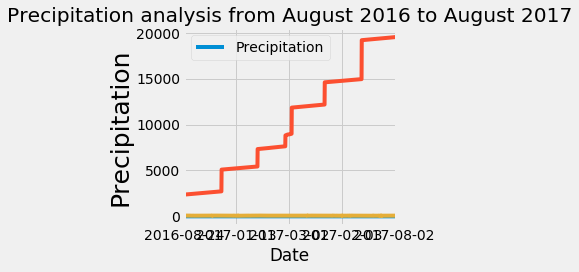

In [304]:
#Plot the precipitation over the last 12 months.
plt.figure(figsize=(15, 15))
precip_last_12mon_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation", fontsize=25, )
plt.title("Precipitation analysis from August 2016 to August 2017")
plt.legend(["Precipitation"])
plt.tight_layout()

# Save an image of the chart and print to screen
plt.savefig("Imagesprecipitation.png")
plt.show()

In [305]:
# Use Pandas to calcualte the summary statistics for the precipitation data
organize_df.describe()

,prcp,id,tobs
count,1142.000000,1142.000000,1142.000000
mean,0.311357,11223.670753,74.280210
std,0.576134,5857.642478,4.063511
min,0.010000,2365.000000,58.000000
25%,0.030000,5353.250000,71.000000
50%,0.100000,11952.500000,75.000000
75%,0.310000,14911.750000,77.000000
max,6.700000,19550.000000,87.000000


![describe](Images/describe.png)

In [306]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
station_first = session.query(Station).first()
station_first

In [307]:
#Show the first row of the station table.

station_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x116ce4690>,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [308]:
# Calculate the total number of stations.

total_stations = session.query(func.count(Station.station))
total_stations = total_stations[0]
total_stations

(9)

In [309]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [310]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active=df.loc[df ["station"] == "USC00519281", :]

mon = active["tobs"].mean()
lowest = active["tobs"].min()
highest = active["tobs"].max()
temp = [lowest, highest, mon]
temp
print(f"Min. temp: {temp_query[0][2]}, Max. temp: {temp_query[0][3]}, Avg temp: {temp_query[0][4]}")

Min. temp: 54.0, Max. temp: 85.0, Avg temp: 71.66378066378067


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a63150>]],
      dtype=object)

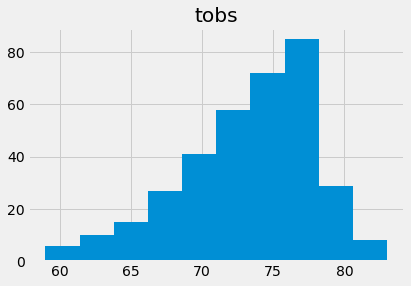

In [311]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active.hist(column='tobs')


![precipitation](Images/station-histogram.png)

In [312]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [313]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_trip = dt.date(2011,2,28)
end_trip = dt.date(2011,3,5)
last_year = dt.timedelta(days=365)
temp_avg_last_year = (calc_temps((start_trip-last_year), (end_trip-last_year)))

print(temp_avg_last_year)

[(63.0, 68.47727272727273, 73.0)]


In [322]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(3,5))
plt.bar(1, tmean_temp, yerr= tmax_temp - tmin_temp, tick_label="", color="orange", align='center', alpha=0.75)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig('Images:trip_avg_temp.png')
plt.show()
    
calc_temps("2017-07-01", "2017-07-15")

NameError: name 'tmean_temp' is not defined

<Figure size 216x360 with 0 Axes>

In [315]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = "2017-03-15"
end_date = "2017-03-25"

sel  = [Station.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
       func.sum(Measurement.prcp)]

station_rain = (session.query(*sel).filter(Measurement.station == Station.station).\
                filter(Measurement.date.between(start_date, end_date))
               .group_by(Station.station)\
                .order_by(func.sum(Measurement.prcp).desc()).all())


station_rain


[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.34),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.92),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.87),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6799999999999999),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.21),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

## Optional Challenge Assignment

In [316]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [317]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [318]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = "2017-03-15"
end_date = "2017-03-25"

# Use the start and end date to create a range of dates
start_range = int(start_date[-2:])
end_range = int(end_date[-2:])

# add 1
trip_duration = end_range - start_range + 1

# Stip off the year and save a list of %m-%d strings
start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')



# Loop through the list of %m-%d strings and calculate the normals for each date

date_list= [dt.datetime.strftime(start_date + dt.timedelta(days=x),'%m-%d')
          for x in range(0, trip_duration)]

normals = [daily_normals(date) for date in date_list]
normals

[[(58.0, 68.54716981132076, 76.0)],
 [(60.0, 69.70370370370371, 78.0)],
 [(57.0, 68.54, 75.0)],
 [(57.0, 67.7843137254902, 76.0)],
 [(60.0, 69.1, 75.0)],
 [(62.0, 70.11764705882354, 80.0)],
 [(60.0, 71.07692307692308, 77.0)],
 [(65.0, 71.75471698113208, 77.0)],
 [(63.0, 70.79629629629629, 78.0)],
 [(62.0, 71.5, 77.0)],
 [(63.0, 71.5, 78.0)]]

In [319]:
from sqlalchemy import extract  

dates=[]
daily_normals_Three_avg=[]
daily_normals_tmax=[]
daily_normals_tmin=[]
daily_normals_tavg=[]

trip_month=3
trip_days=range(1, 16)
def daily_normals():
    
    for i in range(1,16):
        results=session.query(Measurement.date.label("dates"), func.max(Measurement.tobs).label("max_tobs"),\
                             func.min(Measurement.tobs).label("min_tobs"),func.avg(Measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurement.date)==trip_month).\
                             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date)
        results
        for res in results.all():
             print( res)
        
        tmax = res.max_tobs
        tmin= res.min_tobs
        tavg= res.avg_tobs
        date= res.dates
        
        data = [tmax, tmin, tavg]
        
        dates.append(date)
        
        # Append the dtmax, tmin, tavg
        daily_normals_tmax.append(tmax)
        daily_normals_tmin.append(tmin)
        daily_normals_tavg.append(tavg)
        
daily_normals()

('2010-03-01', 70.0, 66.0, 68.125)
('2011-03-01', 74.0, 64.0, 67.88888888888889)
('2012-03-01', 74.0, 67.0, 71.11111111111111)
('2013-03-01', 72.0, 67.0, 70.125)
('2014-03-01', 76.0, 69.0, 71.14285714285714)
('2015-03-01', 76.0, 68.0, 72.0)
('2016-03-01', 73.0, 68.0, 71.71428571428571)
('2017-03-01', 73.0, 64.0, 69.0)
('2010-03-02', 72.0, 67.0, 70.0)
('2011-03-02', 72.0, 61.0, 69.33333333333333)
('2012-03-02', 74.0, 66.0, 69.25)
('2013-03-02', 74.0, 66.0, 71.0)
('2014-03-02', 71.0, 66.0, 68.33333333333333)
('2015-03-02', 78.0, 68.0, 73.625)
('2016-03-02', 71.0, 63.0, 68.28571428571429)
('2017-03-02', 75.0, 72.0, 73.16666666666667)
('2010-03-03', 73.0, 66.0, 69.71428571428571)
('2011-03-03', 74.0, 69.0, 71.5)
('2012-03-03', 73.0, 65.0, 69.71428571428571)
('2013-03-03', 72.0, 67.0, 70.33333333333333)
('2014-03-03', 72.0, 60.0, 64.875)
('2015-03-03', 76.0, 70.0, 73.375)
('2016-03-03', 72.0, 63.0, 68.42857142857143)
('2017-03-03', 78.0, 69.0, 72.71428571428571)
('2010-03-04', 70.0, 65.0, 6

In [320]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Daily_normals_df= pd.DataFrame({'Date': dates, 'tmax': daily_normals_tmax, 'tmin': daily_normals_tmin,'tavg': daily_normals_tavg,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,tmax,tmin,tavg
Date,,,
2017-03-01,73.0,64.0,69.000000
2017-03-02,75.0,72.0,73.166667
2017-03-03,78.0,69.0,72.714286
2017-03-04,77.0,70.0,74.800000
2017-03-05,73.0,68.0,70.500000


FileNotFoundError: [Errno 2] No such file or directory: 'Images/daily_normals.png'

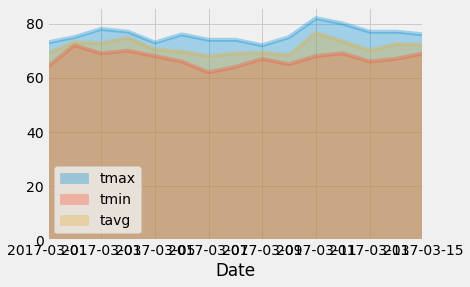

In [321]:
# Plot the daily normals as an area plot with `stacked=False`
Daily_normals_df.plot.area(stacked=False, alpha=.333)
plt.savefig('Images/daily_normals.png')
plt.show()